# Follow-up: fluctuation trends with # of points and data errors

This is a follow-up to `Assignment: Follow-ups to Parameter Estimation notebooks`, which focuses on the trends of fluctuations and how to visualize them.


## A. Parameter estimation example: fitting a straight line


&nbsp; 2.&nbsp;&nbsp; Do exercise 3: "Change the random number seed to get different results and comment on how the maximum likelihood results fluctuate. How are size of the fluctuations related to the number of data points $N$ and the data error standard deviation $dy$?  (Try changing them!)"
<br><br>**The size of the fluctuations decrease as the square root of the number of points `N`. As the data error standard deviation increases, the size of the fluctuations increases linearly with `dy`.**<br><br>

*How do we obtain, visualize, and understand these results?*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set('talk') # for plot formatting
from scipy import optimize

def make_data(intercept, slope, N=20, dy=5, rseed=None):
    """Given a straight line defined by intercept and slope:
          y = slope * x + intercept
       generate N points randomly spaced points from x=0 to x=100
       with Gaussian (i.e., normal) error with mean zero and standard
       deviation dy.
       
       Return the x and y arrays and an array of standard deviations.
    """
    rand = np.random.RandomState(rseed) 
    x = 100 * rand.rand(N)  # choose the x values randomly in [0,100]
    y = intercept + slope * x  # This is the y value without noise
    y += dy * rand.randn(N)    # Add in Gaussian noise
    return x, y, dy * np.ones_like(x)  # return coordinates and error bars

def log_likelihood(theta, x, y, dy):
    y_model = theta[0] + theta[1]*x
    return -0.5*np.sum(np.log(2*np.pi*dy**2)+ (y - y_model)**2/dy**2)

def minfunc(theta, x, y, dy):
    """
    Function to be minimized: minus the logarithm of the likelihood.
    """
    return -log_likelihood(theta, x, y, dy)

### First make tables

In [2]:
intercept = 25.   # true intercept (called b elsewhere)
slope = 0.5       # true slope (called m elsewhere)
theta_true = [intercept, slope]  # put parameters in a true theta vector

iterations = 10

In [3]:
# Fix dy and vary Npts geometrically
dy_data = 5
for Npts in [20, 80, 320]:
    print(f'N = {Npts}, dy = {dy_data}')
    print('          intercept   slope')
    print(f'true:       {intercept:.3f}    {slope:.3f}')
    
    for i in np.arange(iterations):        
        x, y, dy = make_data(*theta_true, N=Npts, dy=dy_data, rseed=None)
        result = optimize.minimize(minfunc, x0=[0, 0], args=(x, y, dy))
        intercept_fit, slope_fit = result.x
    
        print(f'dataset {i}:  {intercept_fit:.3f}    {slope_fit:.3f}')
    print('------------------------------\n')

N = 20, dy = 5
          intercept   slope
true:       25.000    0.500
dataset 0:  26.174    0.509
dataset 1:  26.795    0.459
dataset 2:  24.864    0.559
dataset 3:  31.072    0.394
dataset 4:  24.179    0.471
dataset 5:  26.859    0.485
dataset 6:  22.966    0.535
dataset 7:  24.847    0.507
dataset 8:  27.404    0.447
dataset 9:  23.167    0.548
------------------------------

N = 80, dy = 5
          intercept   slope
true:       25.000    0.500
dataset 0:  24.191    0.501
dataset 1:  27.009    0.460
dataset 2:  25.500    0.484
dataset 3:  24.977    0.496
dataset 4:  25.505    0.499
dataset 5:  25.507    0.488
dataset 6:  26.517    0.476
dataset 7:  27.263    0.481
dataset 8:  25.865    0.478
dataset 9:  24.470    0.498
------------------------------

N = 320, dy = 5
          intercept   slope
true:       25.000    0.500
dataset 0:  25.209    0.500
dataset 1:  25.295    0.492
dataset 2:  25.327    0.489
dataset 3:  23.684    0.522
dataset 4:  24.340    0.512
dataset 5:  24.880    

In [4]:
# Fix Npts and vary dy geometically
Npts = 80
for dy_data in [1, 5, 25]:
    print(f'N = {Npts}, dy = {dy_data}')
    print('          intercept   slope')
    print(f'true:       {intercept:.3f}    {slope:.3f}')
    
    for i in np.arange(iterations):        
        x, y, dy = make_data(*theta_true, N=Npts, dy=dy_data, rseed=None)
        result = optimize.minimize(minfunc, x0=[0, 0], args=(x, y, dy))
        intercept_fit, slope_fit = result.x
    
        print(f'dataset {i}:  {intercept_fit:.3f}    {slope_fit:.3f}')
    print('------------------------------\n')

N = 80, dy = 1
          intercept   slope
true:       25.000    0.500
dataset 0:  24.845    0.502
dataset 1:  24.943    0.498
dataset 2:  25.042    0.503
dataset 3:  25.081    0.498
dataset 4:  25.068    0.500
dataset 5:  24.396    0.510
dataset 6:  24.748    0.502
dataset 7:  25.311    0.492
dataset 8:  25.184    0.497
dataset 9:  25.039    0.500
------------------------------

N = 80, dy = 5
          intercept   slope
true:       25.000    0.500
dataset 0:  25.585    0.501
dataset 1:  25.000    0.491
dataset 2:  26.696    0.487
dataset 3:  25.047    0.511
dataset 4:  26.029    0.492
dataset 5:  24.659    0.502
dataset 6:  23.735    0.527
dataset 7:  25.774    0.485
dataset 8:  25.224    0.511
dataset 9:  23.851    0.527
------------------------------

N = 80, dy = 25
          intercept   slope
true:       25.000    0.500
dataset 0:  31.249    0.401
dataset 1:  25.631    0.465
dataset 2:  25.706    0.410
dataset 3:  26.034    0.479
dataset 4:  32.824    0.335
dataset 5:  8.985    0

### Now make a function for rerunning

In [9]:
def std_of_fit_data(Npts, dy_data, iterations, theta_true=theta_true):
    """Calculate the standard deviations of the slope and intercept 
       for a given number of iterations
    """ 
    intercept_fits = np.zeros(iterations)
    slope_fits = np.zeros(iterations)

    for j in np.arange(iterations):        
        x, y, dy = make_data(*theta_true, N=Npts, dy=dy_data, rseed=None)
        result = optimize.minimize(minfunc, x0=[0, 0], args=(x, y, dy))
        intercept_fits[j], slope_fits[j] = result.x
        
    return intercept_fits.std(), slope_fits.std()    

In [10]:
std_of_fit_data(20, 5, 20)

(2.470408828461945, 0.03646704594146914)

In [11]:
std_of_fit_data(80, 5, 20)

(1.2728489607450393, 0.019372705505140968)

In [12]:
std_of_fit_data(320, 5, 20)

(0.5536226742238538, 0.008939498842638052)

### Now make linear and log-log plots

Which is better? How do you read a power law from a log-log plot?

In [13]:
Npts_array = [20 * 2**i for i in range(10)]
Npts_array

[20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]

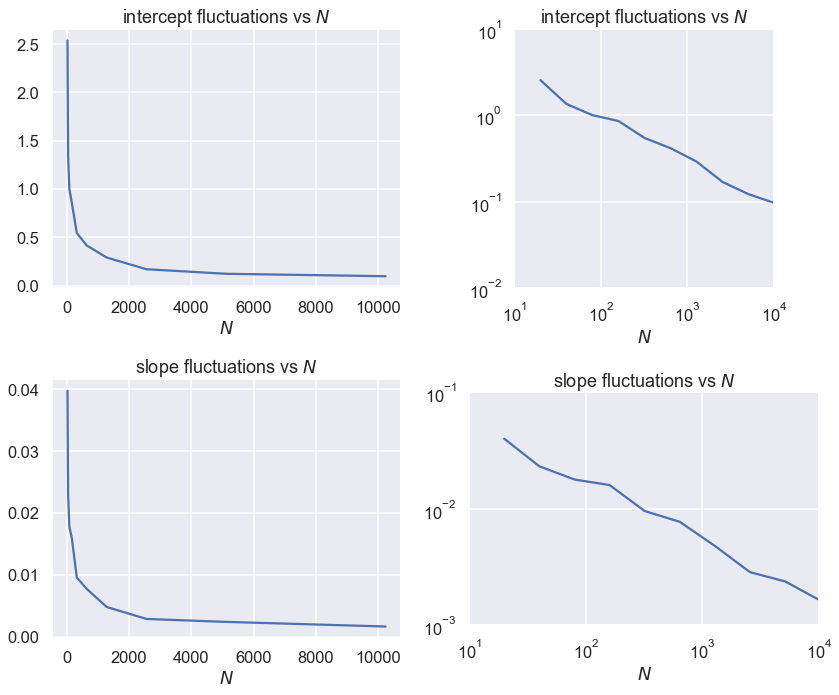

In [15]:
# Fix dy and vary Npts geometrically
dy_data = 5

Npts_array = [20 * 2**j for j in range(10)]
intercept_std_array = np.zeros(len(Npts_array))
slope_std_array = np.zeros(len(Npts_array))

iterations = 50
for i, Npts in enumerate(Npts_array):
    intercept_std_array[i], slope_std_array[i] = std_of_fit_data(Npts, dy_data, iterations)   

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].set_title(r'intercept fluctuations vs $N$')
axes[0,0].set_xlabel(r'$N$')
axes[0,0].plot(Npts_array, intercept_std_array)

axes[0,1].set_title(r'intercept fluctuations vs $N$')
axes[0,1].set_xlabel(r'$N$')
axes[0,1].loglog(Npts_array, intercept_std_array)
axes[0,1].set_xlim(10,1e4)
axes[0,1].set_ylim(.01,10)
axes[0,1].set_aspect('equal')

axes[1,0].set_title('slope fluctuations vs $N$')
axes[1,0].set_xlabel(r'$N$')
axes[1,0].plot(Npts_array, slope_std_array)

axes[1,1].set_title('slope fluctuations vs $N$')
axes[1,1].set_xlabel(r'$N$')
axes[1,1].loglog(Npts_array, slope_std_array)
axes[1,1].set_xlim(10,1e4)
axes[1,1].set_ylim(1e-3,1e-1)
axes[1,1].set_aspect('equal')

fig.tight_layout()



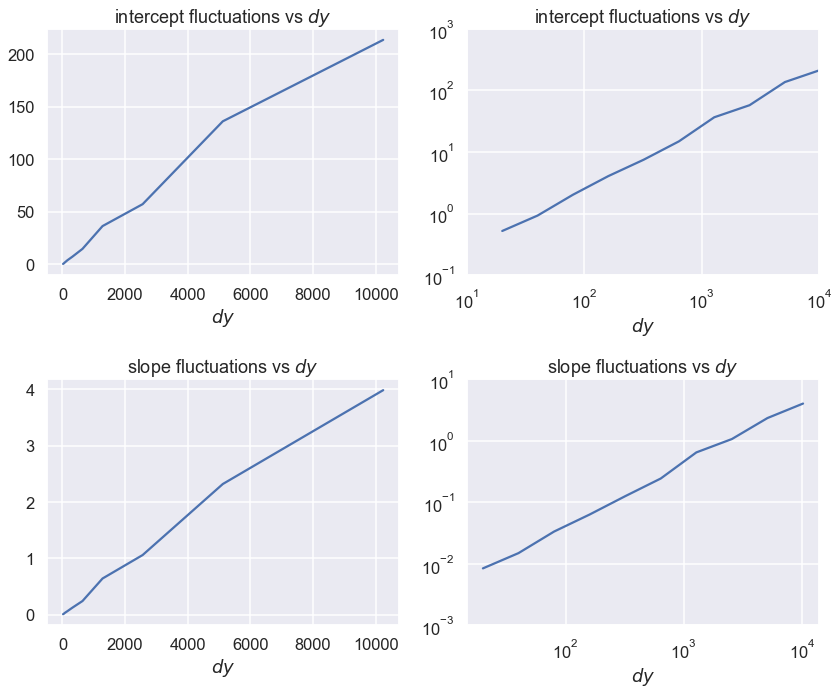

In [17]:
# Fix Npts and vary dy geometrically
Npts = 20

dy_array = [1 * 2**j for j in range(10)]
intercept_std_array = np.zeros(len(dy_array))
slope_std_array = np.zeros(len(dy_array))

iterations = 50
for i, dy_data in enumerate(dy_array):
    intercept_std_array[i], slope_std_array[i] = std_of_fit_data(Npts, dy_data, iterations)   

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].set_title(r'intercept fluctuations vs $dy$')
axes[0,0].set_xlabel(r'$dy$')
axes[0,0].plot(Npts_array, intercept_std_array)

axes[0,1].set_title(r'intercept fluctuations vs $dy$')
axes[0,1].set_xlabel(r'$dy$')
axes[0,1].loglog(Npts_array, intercept_std_array)
axes[0,1].set_xlim(1e1,1e4)
axes[0,1].set_ylim(.1,1000)
#axes[0,1].set_aspect('equal')

axes[1,0].set_title('slope fluctuations vs $dy$')
axes[1,0].set_xlabel(r'$dy$')
axes[1,0].plot(Npts_array, slope_std_array)

axes[1,1].set_title('slope fluctuations vs $dy$')
axes[1,1].set_xlabel(r'$dy$')
axes[1,1].loglog(Npts_array, slope_std_array)
axes[0,1].set_xlim(1e1,1e4)
axes[1,1].set_ylim(1e-3,1e+1)
#axes[1,1].set_aspect('equal')

fig.tight_layout()



1. In both sets of joint posterior graphs, are the slope and intercept correlated?  How do you know? Does it make sense?
<br><br>

1. For the first set of data, answer the question: "What do you conclude about how the form of the prior affects the final posterior in this case?"
<br><br>

1. For the second set of data, answer the question: "Why in this case does the form of the prior have a clear effect?"  You should consider both the size of the error bars and the number of data points (try changing them to explore the impact).
<br><br>